# Visdom
- 터미널에서 python -m vidom.server 입력 (서버열기)

In [44]:
import visdom
vis = visdom.Visdom()
vis.close()


Setting up a new session...


''

In [39]:
# loss값 그리기
import torch

def loss_tracker(loss_plot, loss_value, num):
    vis.line(X = num,
             Y = loss_value,
             win = loss_plot,
             update = 'append')

# window 선언
loss_plt = vis.line(Y = torch.Tensor(1).zero_(), opts = dict(title = "loss_tracker",
                                                            legend = ["loss"],
                                                            showlegend = True))
# 값 넣기
loss_tracker(loss_plt, torch.Tensor(1),torch.Tensor(1))


In [6]:
# multiple line
num = torch.Tensor(list(range(0,10)))
print(num.shape)
num = num.view(-1,1)
print(num.shape)
num = torch.cat((num,num),dim=1)
print(num.shape)
num

# 여러개의 그래프를 한 화면에 그리기
#plt = vis.line(Y = torch.randn(10,2), X = num)

torch.Size([10])
torch.Size([10, 1])
torch.Size([10, 2])


tensor([[0., 0.],
        [1., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.],
        [6., 6.],
        [7., 7.],
        [8., 8.],
        [9., 9.]])

# visdom 다시

In [40]:
vis.close()
num = torch.Tensor([0])
num = num.view(-1,1)
num = torch.cat((num,num),dim=1)
epoch = 0
if epoch == 0:
    plt = vis.line(Y = torch.zeros(1,2), X = num, opts = dict(title = "loss_tracker",
                                                            legend = ["train_loss","test_loss"],
                                                            showlegend = True))

else:
    loss_tracker(plt, loss, epoch)
    


In [42]:
epoch = torch.FloatTensor([[1,1]])
loss = torch.FloatTensor([[2.3,3.5]])

In [43]:

loss_tracker(plt, loss, epoch)

# Imshow
https://stackoverflow.com/questions/35286540/display-an-image-with-python

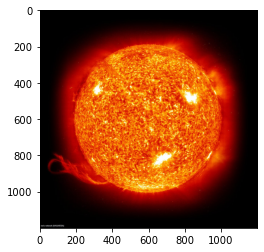

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("data/sun/sun.jpeg") #한번의 변환 과정이 요구된다.
plt.imshow(img)

# 이미지 데이터를 저장하는 방법 (ImageFolder)

In [41]:
# resize
import torchvision
from torchvision import transforms
trans = transforms.Compose([transforms.Resize((64,128))])

# 불러오기
train_data = torchvision.datasets.ImageFolder(
    root = "./data", transform = trans)

#
train_data

Dataset ImageFolder
    Number of datapoints: 2
    Root location: ./data
    StandardTransform
Transform: Compose(
               Resize(size=(64, 128), interpolation=PIL.Image.BILINEAR)
           )

In [51]:
for num, value in enumerate(train_data):
    img,label = value
    print(num, img, label)
    
    # 이떄 라벨에 따른 데이터를 새롭게 저장할 수 있음 -> 폴더들이 모두 존재해야 함.
    if label == 0:
        img.save("data/train_data/class_1/%d_%d.jpeg"%(num,label))
    else:
        img.save("data/train_data/class_2/%d_%d.jpeg"%(num,label))


0 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FD42556E370> 0
1 <PIL.Image.Image image mode=RGB size=128x64 at 0x7FD4254CA1C0> 1


# 위 데이터들은 아래와 같은 방식으로 가져오면 된다.

In [52]:
# ImageFolder 이용
from torch.utils.data import DataLoader


train_data = torchvision.datasets.ImageFolder(root = "data/train_data/", transform = transforms.ToTensor())
data_loader = DataLoader(dataset=train_data, batch_size =2, shuffle = True)


In [59]:
# 참고로 loader에서 dataset은 아래와 같은 방식으로 접근 가능
# dataset은 __len__(), __getitem__() 함수가 구현되야 한다.

data_loader.dataset.__len__()
data_loader.dataset.__getitem__(1)

(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0039],
          ...,
          [0.0196, 0.0078, 0.0000,  ..., 0.0000, 0.0039, 0.0039],
          [0.0275, 0.0157, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.1569, 0.1412, 0.1294,  ..., 0.0039, 0.0039, 0.0039]],
 
         [[0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0118, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0196, 0.0078, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.1490, 0.1333, 0.1216,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

# Weight 저장 및 불러오기

In [ ]:
# 저장
torch.save(model.state_dict(), "./model/model.pth")

# 불러오기 --> 똑같은 Layer 구조여야함 --> 그래야 weight를 있는 그대로 가져올 수 있음.
new_net = CNN().to(device)
new_net.load_state_dict(torch.load("./model/model.pth"))

# Weight 접근하기

In [ ]:
# weight값이 잘 load됐는지 확인하기
print(model.layer1[0])
print(new_net.layer1[0])

print(model.layer1[0].weight[0][0][0])
print(new_net.layer1[0].weight[0][0][0])

# Epoch마다 Weight 저장하기

In [ ]:
# 이때 acc는 100을 곱한 값으로 만들어주면 됌.
torch.save(net.state_dict(), "./model/model_epoch_{}_acc_{}.pth".format(epoch, int(acc)))


# Weight initalization

In [61]:
import torch.nn as nn

class VGG(nn.Module):
    def __init__(self, features, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        
        self.features = features #convolution
        
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096), #custom을 만들거면, 이 부분에서의 수정이 요구됌.
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )#FC layer
        
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x) #Convolution 
        x = self.avgpool(x) # avgpool
        x = x.view(x.size(0), -1) #
        x = self.classifier(x) #FC layer
        return x
    
        ''' 이런 방법이 있구나 '''
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
    

# learning_rate를 학습 중 조정하기

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(vgg16.parameters(), lr = 0.005,momentum=0.9)

lr_sche = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)
#5step 마다 lr = 0.9를 곱해주세요.

In [64]:
def sum(a):
    return a*2

sum(10)

20

In [66]:
def sum2(a: int) -> int:
    return a*2
sum2(200)

400

# Resize 하는 방법

In [1]:
import torchvision
from torchvision import transforms

# transform
trans = transforms.Compose([transforms.Resize((224,224))])

# 불러오기
train_data = torchvision.datasets.ImageFolder(root = "./train_data/", 
                                              transform = trans)

# loader
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=train_data, batch_size = 2, shuffle = True, drop_last = True)

train_loader.dataset

Dataset ImageFolder
    Number of datapoints: 2
    Root location: ./train_data/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
           )

# 내부 데이터 확인

<PIL.Image.Image image mode=L size=224x224 at 0x7FEC97483190> 5
torch.Size([1, 224, 224])


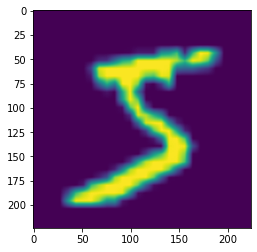

In [2]:
import torchvision.datasets as dsets
import matplotlib.pyplot as plt

Mnist_train = dsets.MNIST(root = "MNIST_data/", transform= trans)

# 내부의 데이터 확인하기
# dataset 자체에 대한 걸
for data in Mnist_train:
    imgs, label = data
    print(imgs,label)
    
    # 사진보기
    plt.imshow(imgs)
    break

# 이미지를 Tensor type으로 확인하기
- transforms.ToTensor()(imgs)

In [7]:
# 사진을 Tensor type으로 보기
t = transforms.ToTensor()(imgs)
print(t.shape)
print(t)

torch.Size([1, 224, 224])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


# Tensor type을 이미지로 확인하기
- transforms.ToPILImage()(t)

t is:  torch.Size([1, 224, 224])


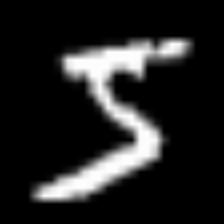

<PIL.Image.Image image mode=RGB size=224x224 at 0x7FEC9443F970>
(224, 224)


In [3]:
# Tensor type을 이미지로.
print("t is: ", t.size())
im = transforms.ToPILImage()(t).convert("RGB")
display(im)
print(im)
print(im.size)

# Depthwise Separable Convolution

In [ ]:
class depthwise_separable_conv(nn.Module):
    def __init__(self, nin, kernels_per_layer, nout):
        super(depthwise_separable_conv, self).__init__()
        self.depthwise = nn.Conv2d(nin, nin * kernels_per_layer, kernel_size=3, padding=1, groups=nin)
        self.pointwise = nn.Conv2d(nin * kernels_per_layer, nout, kernel_size=1)

    def forward(self, x):
        out = self.depthwise(x)
        out = self.pointwise(out)
        return out